# 哲学の道「疎水」が流れる高さを眺めてみる('24.05.27)


## 京都の北東を流れる「疎水分線」を3D地図上で眺める

京都の街、北から南に下る斜度が割とあるのにも関わらず、琵琶湖から蹴上経由で白川にグルリと向かう疎水分線(いわゆる哲学の道沿いを流れる疎水)は、京都の外れを北上して流れている。
そこで、国土地理院の[地理院地図](https://maps.gsi.go.jp/#15/35.026236/135.773249/&base=pale&ls=pale%7Cort_USA10%2C0.13%7Crelief_free%2C0.17%7Chillshademap%2C0.52&blend=010&disp=1111&lcd=hillshademap&vs=c1g1j0h0k0l0u0t0z0r0s0m0f1&reliefdata=239.8G0000FFG3CG0095FFG3E.8G00EEFFG41G91FF00G43.8GFFFF00G46GFF8C00GGFF4400)で、京都の北東を流れる「疎水分線」が流れるあたりを、[インタラクティブな3D地図上](https://hirax.github.io/wow/appendix/day_240527_webgl/)で眺めてみた。

標高情報を使い色づけや高さ強調をしてみると、まるでジェットコースターのように、疎水分線は京都北東の斜面を流れ下っていることがわかる。

In [1]:
from IPython.display import IFrame
IFrame('https://hirax.github.io/wow/appendix/day_240527_webgl/', width=800, height=600)

## 疎水分線の標高を地図上で眺めてみる

せっかくなので、地理院地図の「ツール-計測」機能をて、疎水が流れる場所や標高をGeoJSONファイルやCSVファイルに出力してみた。
それらのファイルを、インタラクティブな2D地図上に読み込んで、その場所の標高を数値にして重ねて描いてみる。

疎水分線の場所ごとの標高値を地図上で眺めると、比較的斜度があるのは、北白川近くを北上するあたりだということがわかる。
ずっと昔、銀閣地道近くの天下一品近くから天下一品本店に向かおうとした時に、よく通ったルートだ。

In [2]:
# foliumパッケージを使う
import folium
import pandas as pd

# 中心とする緯度経度
kyoto = [35.029607283171565, 135.78063320502486]

# 疎水GeoJsonデータ
geojson_file='data/day_240527_csline20240527074909247.geojson'
# 疎水csvデータ(緯度、経度、標高、距離)
csv_file='data/day_240527_csdata20240527074922881.csv'
csv_df = pd.read_csv(csv_file)

print(csv_df.columns)

Index(['lat', 'lng', 'elevation', 'distance'], dtype='object')


In [3]:
# 地図を作る
def create_map(zoom_level,step,min_val,max_val):
    fmap = folium.Map(
        location=kyoto,
        zoom_start=zoom_level,
        attr='OpenStreetMap & 国土地理院地図'
    )
    style = {
        #'fillColor':'#0000FF90',
        'color':'#0000FF60',
        'weight':10}
    
    folium.GeoJson(
            open(geojson_file).read(),
            name='哲学の道疎水',
            style_function=lambda x:style
        ).add_to(fmap)    
    folium.LayerControl().add_to(fmap)
    for idx, row in csv_df.iterrows():
        r=int(255*(row['elevation']-min_val)/(max_val-min_val))
        b=255-r
        g=0#255-2*abs(r-128)
        val='{:06X}'.format(256*256*r+256*g+b)
        if idx%step == 0:
            folium.Marker(
                location=[row['lat'],row['lng']],
                icon=folium.DivIcon(
                    html=f"""<div style="font-size:9pt;color:#{val};">{row['elevation']}</div>""")
            ).add_to(fmap)    
    return fmap # 表示

# 地図を描く
create_map(13,10,35,80)

## 斜度があるのは北白川近くを北上するあたり

せっかくなので、横軸が距離、縦軸は標高のグラフも描いてみる。
眺めると、最初の2kmほど、哲学の道沿いを北上するあたりは疎水分線の流れは緩やかだ。
その後、天下一品の銀閣寺道店から、やっぱり本店で口直しをしようと歩く北白川あたりで、斜度が急になる。

その後、北大路通と向きを同じくして東から西に回るあたりの4kmは、緩やかな流れに戻る。

最後に、「堀川」となって北から南に京都の坂道を流れていくようになると、北白川あたりと同じ「1kmあたり10ｍ程度下がる」という斜度になる。

Text(0, 0.5, 'Elevation(m)')

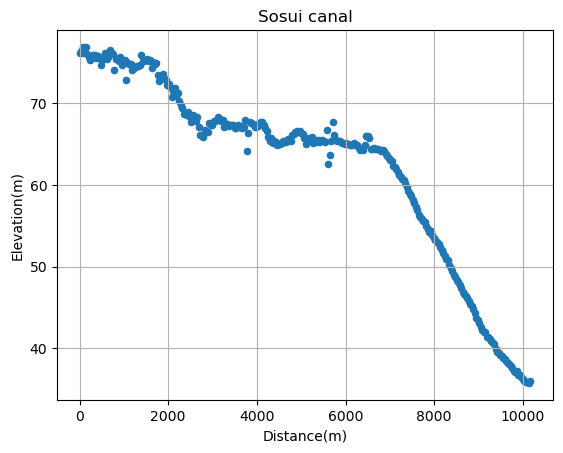

In [4]:
# 距離に応じた高さを描く
ax=csv_df.plot.scatter(x='distance', y='elevation', title='Sosui canal')
ax.set_xlabel("Distance(m)")
ax.grid()
ax.set_ylabel("Elevation(m)")

## 画家マウリッツ・エッシャーの父も疎水設計に関わった

疎水を設計したヨハニス・デ・レーケは、お雇い外国人として1873年に来日した。
オランダから一緒に来たのが、ジョージ・エッシャー、画家マウリッツ・エッシャーの父だ。


北東に下る斜面に広がる京都盆地を南から北に流れる疎水は、エッシャーが描いた「滝」のように、少し不思議だ。
立体的な地形を3Dプリントして、そこに枯山水のように疎水の流れを再現してみても面白いかもしれない。

%<img style="float:center;transform: rotate(0deg); height:14cm" src="./images/day_240527_Escher_Waterfall.jpg" />
```{figure} ./images/day_240527_Escher_Waterfall.jpg
---
height: 14cm
---
Waterfall (M. C. Escher)
```